In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [2]:
#help(datetime)

In [3]:
dateparse = lambda dates: datetime.strptime(dates, '%b-%y')

In [4]:
traffic = pd.read_csv("USCarrier_Traffic.csv", infer_datetime_format=True,index_col='Period', parse_dates=['Period'],date_parser=dateparse)
traffic.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [5]:
df = traffic['Total']

In [6]:
df.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [7]:
df.tail()

Period
2019-10-01    88208131
2019-11-01    81010193
2019-12-01    90389583
2020-01-01    81537476
2020-02-01    74428909
Name: Total, dtype: int64

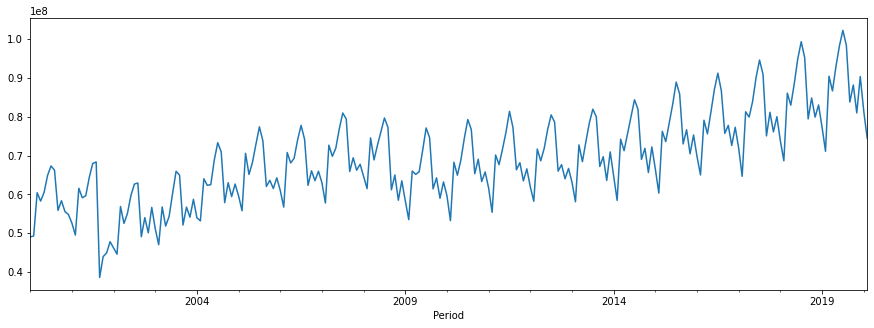

In [8]:
df.plot(kind="line",figsize=(15,5))
plt.show()

In [9]:
df.shape

(242,)

#### 19 years for train dataset & 1yr 2mths for test data

In [10]:
#train=df[0:228] 
#test=df[228:]
train_size = int(len(df) * 0.942)
train, test = df[0:train_size], df[train_size:]

In [11]:
train.shape

(227,)

In [12]:
test.shape

(15,)

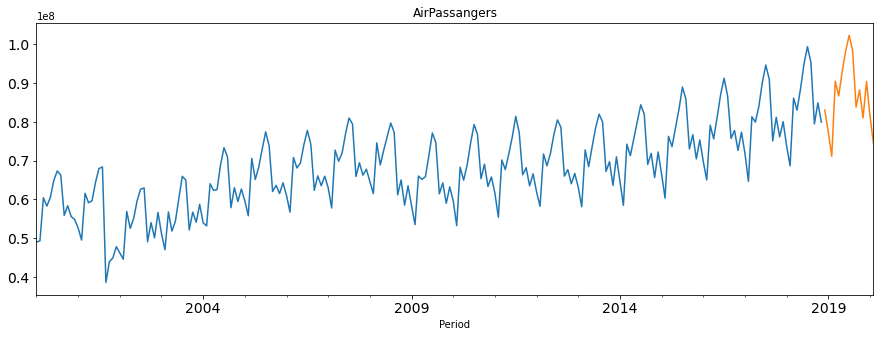

In [13]:
train.plot(figsize=(15,5), title= 'AirPassangers', fontsize=14)
test.plot(figsize=(15,5), title= 'AirPassangers', fontsize=14)
plt.show()

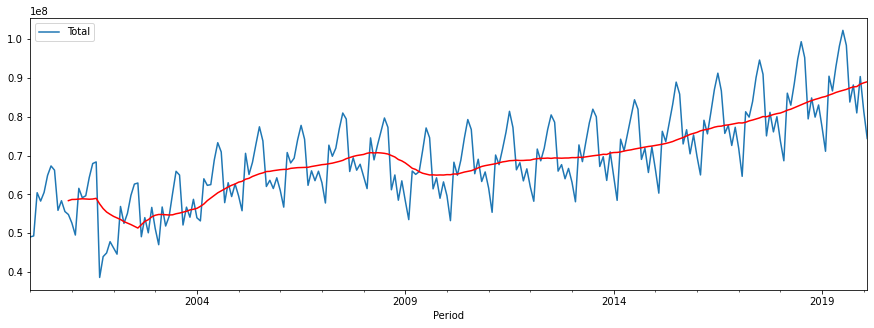

In [14]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =df.rolling(12).mean()
traffic.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

<ipython-input-15-0eac22b8678d>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sts.seasonal_decompose(df,model='multiplicative', freq=12)


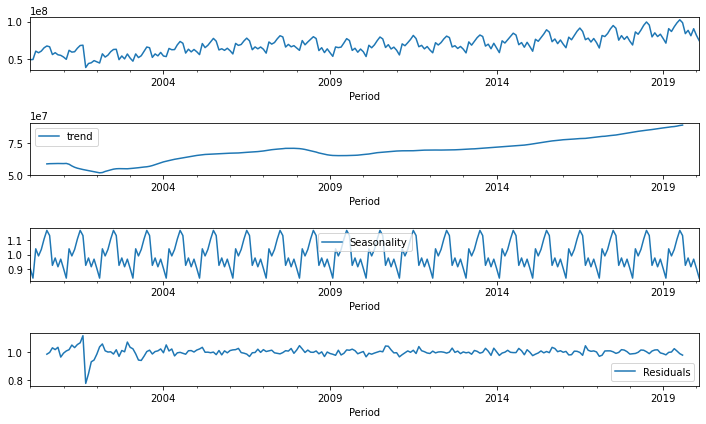

In [15]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<ipython-input-16-f220803ac275>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sts.seasonal_decompose(df,model='additive', freq=12)


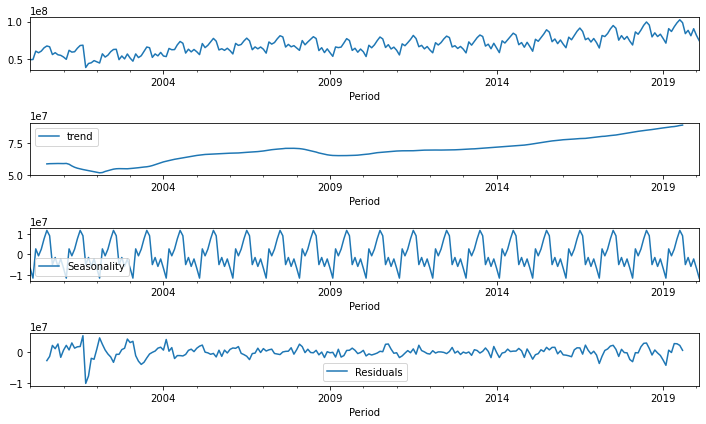

In [16]:
decomposition = sts.seasonal_decompose(df,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [17]:
seasonal.head(10)

Period
2000-01-01   -6.695877e+06
2000-02-01   -1.148633e+07
2000-03-01    2.669037e+06
2000-04-01   -6.925733e+05
2000-05-01    2.541159e+06
2000-06-01    7.536628e+06
2000-07-01    1.161299e+07
2000-08-01    9.003791e+06
2000-09-01   -4.951086e+06
2000-10-01   -1.509065e+06
Name: seasonal, dtype: float64

In [18]:
trend.head(10)

Period
2000-01-01             NaN
2000-02-01             NaN
2000-03-01             NaN
2000-04-01             NaN
2000-05-01             NaN
2000-06-01             NaN
2000-07-01    5.855037e+07
2000-08-01    5.870934e+07
2000-09-01    5.876591e+07
2000-10-01    5.884910e+07
Name: trend, dtype: float64

In [19]:
residual.head(10)

Period
2000-01-01             NaN
2000-02-01             NaN
2000-03-01             NaN
2000-04-01             NaN
2000-05-01             NaN
2000-06-01             NaN
2000-07-01   -2.816981e+06
2000-08-01   -1.456326e+06
2000-09-01    2.085676e+06
2000-10-01    1.033961e+06
Name: resid, dtype: float64

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [21]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='mul', seasonal="multiplicative").fit()
hwes.summary()

C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,227
Model:,ExponentialSmoothing,SSE,865503648683565.125
Optimized:,True,AIC,6608.050
Trend:,Multiplicative,BIC,6662.849
Seasonal:,Multiplicative,AICC,6611.338
Seasonal Periods:,12,Date:,"Sun, 26 Sep 2021"
Box-Cox:,False,Time:,10:51:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,True
smoothing_trend,0.0250000,beta,True


In [22]:
hwes1 = hwes.forecast(12)

<AxesSubplot:xlabel='Period'>

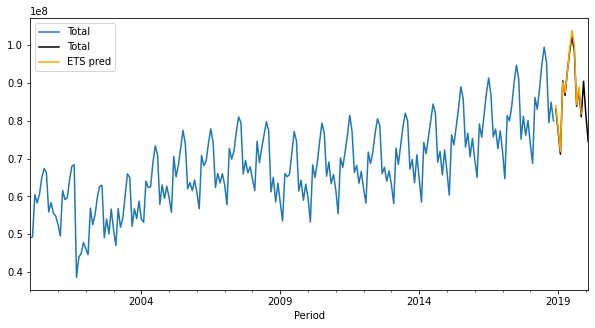

In [23]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

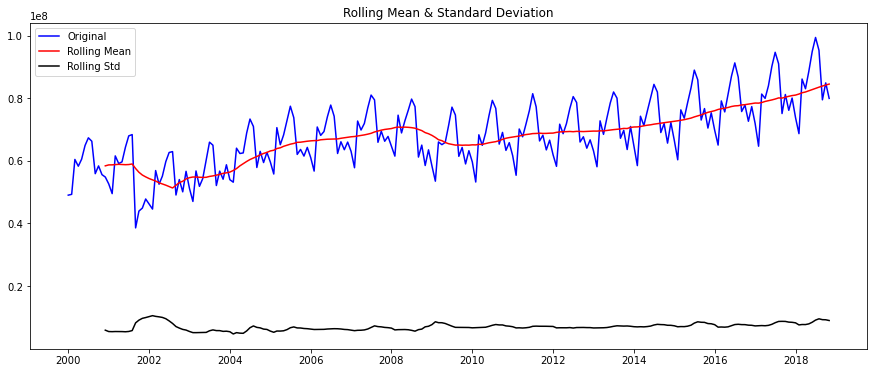

Results of Dickey-Fuller Test:
Test Statistic                  -0.087037
p-value                          0.950714
#Lags Used                      13.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


In [25]:
test_stationarity(train)

#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [26]:
diff1=train.diff()
diff1=diff1.dropna()

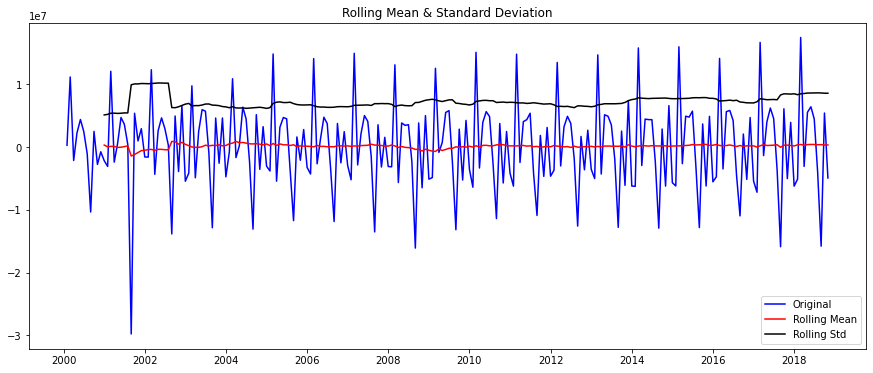

Results of Dickey-Fuller Test:
Test Statistic                  -3.819109
p-value                          0.002718
#Lags Used                      12.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


In [27]:
test_stationarity(diff1)

In [28]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

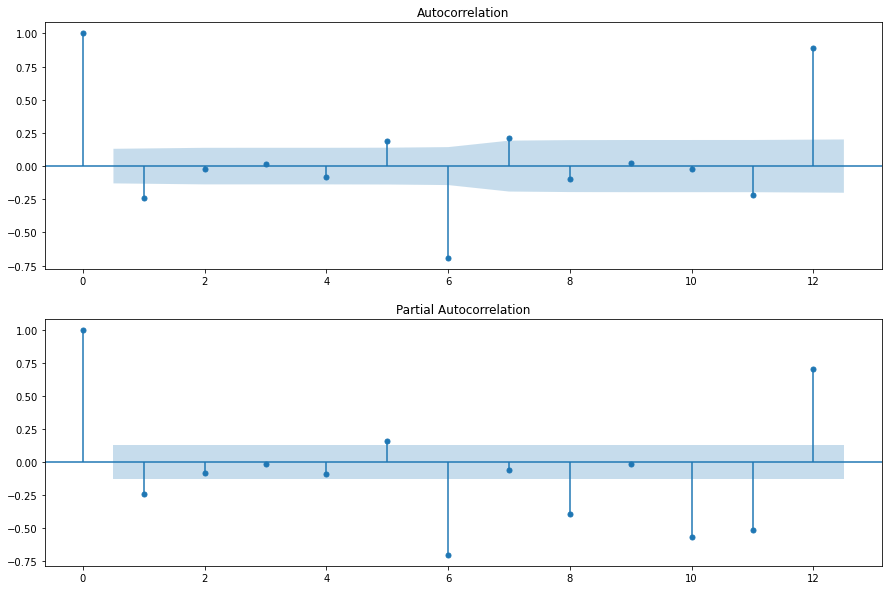

In [29]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

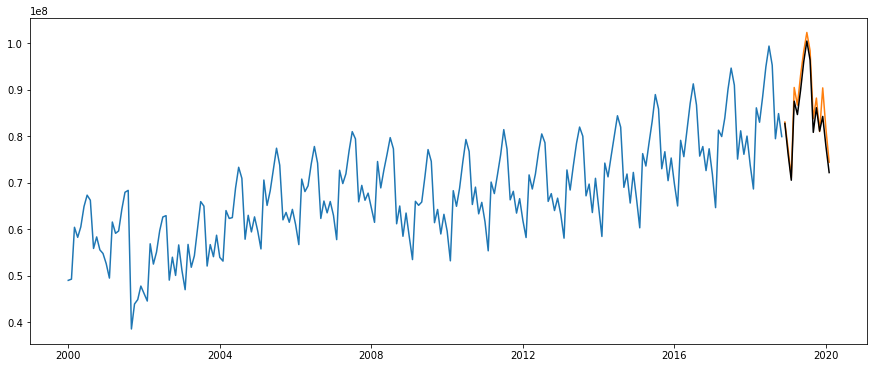

In [30]:
from pmdarima import auto_arima
model = auto_arima(train,seasonal=True, m=12)
model_auto = model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [31]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

NameError: name 'mean_absolute_error' is not defined

In [ ]:
print(model_auto.summary())

## using AUTOARIMA we get result shown above, AIC = 6994.836 with (p,d,q)=(1,0,2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train, order=(1,1,1))
model_fit=model.fit(disp=True)
print(model_fit.summary())

## using parameter (p,d,q)=(1,1,1) as per ACF and PACF, we get mse= 6199486.201  and aic = 7720

### to find best parameter for model

In [ ]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.942)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
p_values = [0, 1, 2, 3]
d_values = range(0, 3) #this is the range for the values
q_values = range(0, 3) #this is the range for the values

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
evaluate_models(df.values, p_values, d_values, q_values)

### Best ARIMA model with parmeter values p,d,q =(3,1,2)

In [ ]:
train_sizefin = int(len(df) * 0.942)
trainfin, testfin = df[0:train_sizefin], df[train_sizefin:]

In [ ]:
trainfin.shape

In [ ]:
testfin.shape

In [ ]:
test_stationarity(trainfin)

In [ ]:
diff_fin1 = trainfin.diff()
diff_fin1=diff_fin1.dropna()

In [ ]:
test_stationarity(diff_fin1)

In [ ]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff_fin1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff_fin1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [ ]:
modelfin = ARIMA(trainfin, order=(3,1,2))
model_fit_fin=modelfin.fit(disp=True)
print(model_fit_fin.summary())

## using parameter (p,d,q)=(3,1,2) as per best values searched, we get mse= 5923828.373  and aic = 7707.047

## better then model builded above using ACF & PACF values for p,d,q

In [ ]:
forecast_fin = model_fit_fin.forecast(steps=15)[0]

forecast_fin = pd.DataFrame(forecast_fin,index = testfin.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(trainfin, label='Train')
plt.plot(testfin, label='Test')
plt.plot(forecast_fin, label='Prediction', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(mean_absolute_error(y_true=testfin,y_pred=forecast_fin))

## forecast and testfin

In [ ]:
import statsmodels.api as sm

In [ ]:
model_sari = sm.tsa.SARIMAX(trainfin, order=(3,1,2), seasonal_order=(3,1,2,12))

In [ ]:
model_fit_sari=model_sari.fit(disp=True)
print(model_fit_sari.summary())

In [ ]:
forecast_sari = model_fit_sari.forecast(steps=15)
#print(forecast)

#plot the predictions for validation set
plt.plot(trainfin, label='Train')
plt.plot(testfin, label='Test')
plt.plot(forecast_sari, label='Prediction', color='black')
plt.show()

In [ ]:
print(mean_absolute_error(y_true=testfin,y_pred=forecast_sari))


## getting better then all models implemented above wih MSE = 983549.4330878893 & AIC =6866.765

In [ ]:
res = model_fit_sari.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()